# General Language Model
Write a program that prompts a user for a starting sentence or theme. Then, use an LLM API (could be OpenAI's or Google's) to generate a certain style of text continuation based on the input.  You may choose your own style.

In this assignment, I will be using Google's Gemini API.

### Import Libraries

In [2]:
import google.generativeai as genai

import random
import time
import pandas as pd
import seaborn as sns

import config
import dataset

/mnt/c/Users/espir/Documents/DLSU/MS/3rd Term AY23-24/CSC714M/general-language-model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Authenticate Google Cloud Information to access Google API

In [2]:
!gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=324070085151-3jv8j73qtehnrtofnvjglcd97vl3leq1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=FdA3ssZorXCB7donxZqbl7pW4VbTDS&access_type=offline&code_challenge=San-5s5Ol1OFmXKg-F0tcSjoS3MB7_2zgYKGZgbzIRY&code_challenge_method=S256


Credentials saved to file: [/home/dysconyus/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).


### Create a Fine-tuned model

In [28]:
base_model = [
    m
    for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods
][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      top_p=1.0,
      top_k=None)

In [29]:
name = f"f1-commentary-{random.randint(0, 10000)}"

operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=dataset.commentary_data,
    id=name,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)

In [30]:
model = genai.get_tuned_model(f"tunedModels/{name}")

model

TunedModel(name='tunedModels/f1-commentary-5019',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 5, 12, 4, 26, 59, 524336, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 5, 12, 4, 26, 59, 524336, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 5, 12, 4, 27, 3, 809547, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001

### See List of Tuned Models

In [4]:
print(
    "\nAvailable tuned models:",
    [m.name for i, m in zip(range(5), genai.list_tuned_models())],
)


Available tuned models: ['tunedModels/f1-commentary-5019']


### Check tuning progress

In [32]:
# check the model's metadata
operation.metadata

tuned_model: "tunedModels/f1-commentary-5019"
total_steps: 375

In [33]:
# As the new model is in a "creating" state we must wait for it to finish
for status in operation.wait_bar():
    time.sleep(30)

100%|██████████| 375/375 [07:12<00:00,  1.15s/it]


#### Check Loss Curve

<Axes: xlabel='epoch', ylabel='mean_loss'>

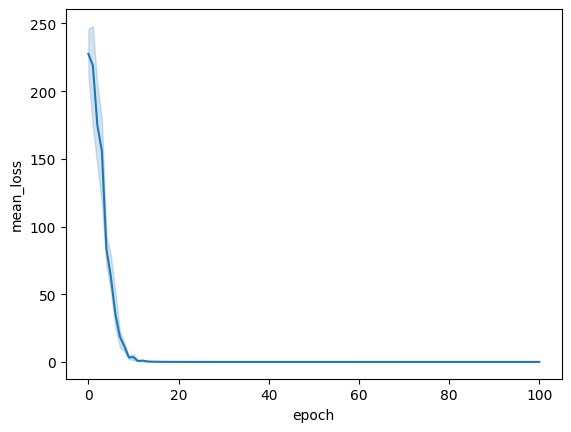

In [34]:
model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x="epoch", y="mean_loss")

### Try the tuned model with new inputs

In [9]:
test_name = "tunedModels/f1-commentary-5019"
model = genai.GenerativeModel(model_name=f"{test_name}")
model.model_name

'tunedModels/f1-commentary-5019'

In [13]:
result = model.generate_content(config.CONTEXT + input())

print(result.text)

Glass shatters into a million pieces as the cars collide, the deafening screech of brakes piercing through the air. Hamilton's Mercedes, a blur of silver and speed, has clipped the rear of Verstappen's Red Bull, sending both cars spinning into the gravel. The crowd gasps in unison, their hearts pounding in their chests. The safety car is deployed, its lights flashing furiously, as the marshals rush to clear the wreckage. The race is on hold, the tension hanging heavy in the air.
